In [1]:
import pandas as pd
from pybaseball import statcast, playerid_lookup
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
#getting all pitches from 2019 season
data = statcast('2019-03-15','2019-11-15', verbose = False)

This is a large query, it may take a moment to complete
Query unsuccessful for data from 2019-11-04 to 2019-11-08. Skipping these dates.
Query unsuccessful for data from 2019-11-09 to 2019-11-09. Skipping these dates.
Query unsuccessful for data from 2019-11-10 to 2019-11-14. Skipping these dates.
Query unsuccessful for data from 2019-11-15 to 2019-11-15. Skipping these dates.


In [7]:
#mlb ids for catchers
data.head().fielder_2

0    543228.0
1    543228.0
2    543228.0
3    543228.0
4    543228.0
Name: fielder_2, dtype: float64

In [8]:
from pybaseball import playerid_reverse_lookup

In [11]:
data.description.unique()

array(['swinging_strike', 'foul', 'ball', 'called_strike',
       'hit_into_play', 'hit_into_play_score', 'hit_into_play_no_out',
       'swinging_strike_blocked', 'blocked_ball', 'hit_by_pitch',
       'foul_bunt', 'foul_tip', 'missed_bunt', 'pitchout',
       'bunt_foul_tip'], dtype=object)

In [12]:
data.shape

(735572, 90)

In [13]:
#only looking at called strikes
cstrikes = data[data['description'] == 'called_strike']

In [14]:
cstrikes.shape

(120868, 90)

In [15]:
#getting all balls
balls = data[data['description'] == 'ball']

In [16]:
balls.shape

(247028, 90)

In [30]:
import matplotlib.pyplot as plt

In [71]:
#getting all strikes that were out of the strike zone
ooz_strikes = cstrikes.loc[~(((cstrikes['plate_z'] <= cstrikes['sz_top']) & 
                           (cstrikes['plate_z'] >= cstrikes['sz_bot'])) & 
                             ((cstrikes['plate_x'] >= (-8.5/12)) &
                            (cstrikes['plate_x'] <= (8.5/12))))]

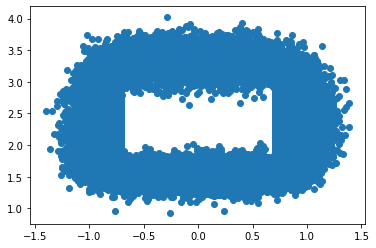

In [73]:
plt.scatter(ooz_strikes['plate_x'],ooz_strikes['plate_z'])

In [80]:
import seaborn as sns

In [82]:
#making octant column so I can measure the distance of each pitch from the zone based on octant
ooz_strikes['octant'] = 'oct0'

/Users/jeremiahwilson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [84]:
ooz_strikes.loc[(ooz_strikes['plate_z'] > ooz_strikes['sz_top']) & 
                ((ooz_strikes['plate_x'] <= 8.5/12) & (ooz_strikes['plate_x'] >= (-8.5/12))), 'octant'] = 'oct1'

/Users/jeremiahwilson/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [86]:
ooz_strikes.loc[(ooz_strikes['plate_z'] > ooz_strikes['sz_top']) & 
                ((ooz_strikes['plate_x'] > 8.5/12)), 'octant'] = 'oct2'

In [88]:
ooz_strikes.loc[((ooz_strikes['plate_z'] <= ooz_strikes['sz_top']) & 
                 (ooz_strikes['plate_z'] >= ooz_strikes['sz_bot'])) & 
                ((ooz_strikes['plate_x'] > 8.5/12)), 'octant'] = 'oct3'

In [90]:
ooz_strikes.loc[(ooz_strikes['plate_z'] < ooz_strikes['sz_bot']) & 
                ((ooz_strikes['plate_x'] > 8.5/12)), 'octant'] = 'oct4'

In [92]:
ooz_strikes.loc[(ooz_strikes['plate_z'] < ooz_strikes['sz_bot']) & 
                ((ooz_strikes['plate_x'] <= 8.5/12) & (ooz_strikes['plate_x'] >= (-8.5/12))), 'octant'] = 'oct5'

In [93]:
ooz_strikes.loc[(ooz_strikes['plate_z'] < ooz_strikes['sz_bot']) & 
                ((ooz_strikes['plate_x'] < (-8.5/12))), 'octant'] = 'oct6'

In [94]:
ooz_strikes.loc[((ooz_strikes['plate_z'] <= ooz_strikes['sz_top']) & 
                 (ooz_strikes['plate_z'] >= ooz_strikes['sz_bot'])) & 
                ((ooz_strikes['plate_x'] < (-8.5/12))), 'octant'] = 'oct7'

In [95]:
ooz_strikes.loc[(ooz_strikes['plate_z'] > ooz_strikes['sz_top']) & 
                ((ooz_strikes['plate_x'] < (-8.5/12))), 'octant'] = 'oct8'

In [100]:
ooz_strikes.shape

(40462, 91)

In [103]:
#getting only pitches that have coordinates
ooz_strikes = ooz_strikes[ooz_strikes['plate_x'].notnull()]

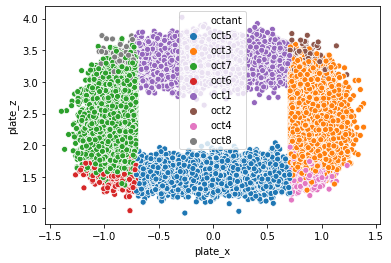

In [104]:
#making sure our octants are correct
sns.scatterplot(ooz_strikes['plate_x'],ooz_strikes['plate_z'], hue = ooz_strikes['octant'])

In [108]:
ooz_strikes['distance_from_zone'] = 0

/Users/jeremiahwilson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
#now we can start calculating the distance from the zone based on octant
ooz_strikes.loc[ooz_strikes['octant'] == 'oct1', 'distance_from_zone'] = ooz_strikes['plate_z']-ooz_strikes['sz_top']

In [119]:
import numpy as np
ooz_strikes.loc[ooz_strikes['octant'] == 'oct2', 'distance_from_zone'] = np.sqrt((((ooz_strikes['plate_x']-(8.5/12))**2)+ (ooz_strikes['plate_z']- ooz_strikes['sz_top'])**2))

In [121]:
ooz_strikes.loc[ooz_strikes['octant'] == 'oct3', 'distance_from_zone'] = ooz_strikes['plate_x'] - (8.5/12)

In [126]:
ooz_strikes.loc[ooz_strikes['octant'] == 'oct4', 'distance_from_zone'] = np.sqrt((((ooz_strikes['plate_x']-(8.5/12))**2) + (ooz_strikes['plate_z']-ooz_strikes['sz_bot'])**2))

In [127]:
ooz_strikes.loc[ooz_strikes['octant'] == 'oct5', 'distance_from_zone'] = ooz_strikes['sz_bot']-ooz_strikes['plate_z']

In [128]:
ooz_strikes.loc[ooz_strikes['octant'] == 'oct6', 'distance_from_zone'] = np.sqrt((((ooz_strikes['plate_x']-(-8.5/12))**2) + (ooz_strikes['plate_z']-ooz_strikes['sz_bot'])**2))

In [129]:
ooz_strikes.loc[ooz_strikes['octant'] == 'oct7', 'distance_from_zone'] = np.sqrt((ooz_strikes['plate_x'] - (-8.5/12))**2)

In [130]:
ooz_strikes.loc[ooz_strikes['octant'] == 'oct8', 'distance_from_zone'] = np.sqrt((((ooz_strikes['plate_x']-(-8.5/12))**2)+ (ooz_strikes['plate_z']- ooz_strikes['sz_top'])**2))

In [134]:
#just checking to make sure I calculated the distances correctly
ooz_strikes.groupby('octant').first()[['plate_x','plate_z','distance_from_zone','sz_top','sz_bot']]

,plate_x,plate_z,distance_from_zone,sz_top,sz_bot
octant,,,,,
oct1,0.227985,3.419080,0.120703,3.298377,1.541830
oct2,0.922755,3.130959,0.233147,3.039413,1.452196
oct3,0.767843,2.406421,0.059509,3.268428,1.600939
oct4,0.829764,1.500406,0.269375,3.517300,1.740858
oct5,-0.616333,1.605027,0.021979,3.529005,1.627006
oct6,-0.918186,1.659774,0.210551,3.553659,1.676909
oct7,-0.867256,2.694645,0.158923,3.663244,1.719069
oct8,-0.734128,3.045160,0.070207,2.979863,1.281565


In [139]:
#grouping by catcher
catchers = ooz_strikes.groupby('fielder_2').mean()

In [163]:
#sorting by highest average distance from zone
catchers = catchers.sort_values(by='distance_from_zone', ascending = False)

In [164]:
catchers['distance_from_zone'].mean()*12

1.7022730358852034

In [165]:
#looking up all the names of the catchers corresponding to their MLBID
name_df = playerid_reverse_lookup(catchers.index, key_type='mlbam')

Gathering player lookup table. This may take a moment.


In [166]:
#making a new column with their full names
name_df['name'] = name_df['name_first']+' '+name_df['name_last']

In [167]:
#calculating the number of stolen strikes the catcher has
ids = catchers.index
pitch_count = []
for i in range(len(ids)):
    
    count = len(ooz_strikes.loc[ooz_strikes['fielder_2']==ids[i]])
    
    pitch_count.append(count)

In [187]:
name_df = name_df.set_index('key_mlbam')

In [189]:
name_df['distance_from_zone'] = catchers['distance_from_zone']

In [194]:
name_df = name_df.sort_values(by='distance_from_zone', ascending = False)

In [196]:
for i in range(len(name_df.index)):
    name_df['pitch_count'][i] = len(ooz_strikes.loc[ooz_strikes['fielder_2']== name_df.index[i]])

/Users/jeremiahwilson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [211]:
name_df = name_df.drop('pitch_count', axis=1)

In [214]:
small_df = name_df[['name','distance_from_zone']]

In [217]:
pitch_num = []
for i in range(len(small_df.index)):
    count = len(ooz_strikes.loc[ooz_strikes['fielder_2']== small_df.index[i]])
    
    pitch_num.append(count)

In [218]:
small_df['pitch_count'] = pitch_num

/Users/jeremiahwilson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [231]:
qualified = small_df.loc[small_df['pitch_count']>=500]

In [232]:
qualified['distance_from_zone'] = qualified['distance_from_zone']*12

/Users/jeremiahwilson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [234]:
qualified.shape

(34, 3)

In [236]:
qualified[0:16]

,name,distance_from_zone,pitch_count
key_mlbam,,,
595978,austin hedges,1.965924,913
457763,buster posey,1.891855,835
467092,wilson ramos,1.891685,962
518735,yasmani grandal,1.856082,1069
435263,brian mccann,1.835917,670
452095,tyler flowers,1.825966,714
575929,willson contreras,1.824694,784
592663,j. t. realmuto,1.824060,1089
571466,tucker barnhart,1.806727,670


In [237]:
hedges = ooz_strikes.loc[ooz_strikes['fielder_2']==595978]

In [247]:
hedges.events.unique()

array([nan, 'strikeout', 'caught_stealing_2b'], dtype=object)

In [250]:
hedges.groupby('octant').mean()

,index,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,...,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,distance_from_zone
octant,,,,,,,,,,,,,,,,,,,,,
oct1,11948.168831,87.688312,-0.070751,6.066806,570799.532468,636105.935065,NaN,NaN,NaN,NaN,...,2.623377,2.389610,2.363636,2.116883,2.636364,2.363636,2.389610,2.116883,2.636364,0.142557
oct2,6298.800000,89.120000,0.466667,6.205367,554276.800000,663211.800000,NaN,NaN,NaN,NaN,...,1.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,0.157845
oct3,11518.969880,89.143072,-0.299334,6.007923,566727.280120,615753.448795,NaN,NaN,NaN,NaN,...,2.165663,2.509036,2.213855,2.358434,2.364458,2.213855,2.509036,2.358434,2.364458,0.178244
oct4,10022.740741,86.833333,-0.780238,5.810106,544101.074074,593294.000000,NaN,NaN,NaN,NaN,...,2.074074,3.111111,2.518519,2.703704,2.925926,2.518519,3.111111,2.703704,2.925926,0.185796
oct5,12299.138298,88.004255,-0.276528,6.011066,555425.718085,614189.579787,NaN,NaN,NaN,NaN,...,2.265957,2.202128,2.175532,2.090426,2.287234,2.175532,2.202128,2.090426,2.287234,0.140238
oct6,12540.285714,88.700000,-0.304845,5.721180,557908.380952,604835.476190,NaN,NaN,NaN,NaN,...,2.714286,2.666667,1.714286,2.095238,2.285714,1.714286,2.666667,2.095238,2.285714,0.247197
oct7,11825.934109,89.963178,-0.337180,5.920235,558341.980620,614008.790698,NaN,NaN,NaN,NaN,...,2.302326,2.581395,2.186047,2.205426,2.562016,2.186047,2.581395,2.205426,2.562016,0.159477
oct8,9500.600000,92.960000,-1.429421,6.242147,566634.200000,644574.800000,NaN,NaN,NaN,NaN,...,2.200000,1.000000,1.200000,1.400000,0.800000,1.200000,1.000000,1.400000,0.800000,0.182736


In [251]:
no_swing = data.loc[(data['description']== 'ball') | (data['description']== 'called_strike')]

In [252]:
no_swing.shape

(367896, 90)

In [254]:
no_swing = no_swing[no_swing['plate_x'].notnull()]
no_swing['octant'] = 'oct0'
no_swing.loc[(no_swing['plate_z'] > no_swing['sz_top']) & 
                ((no_swing['plate_x'] <= 8.5/12) & (no_swing['plate_x'] >= (-8.5/12))), 'octant'] = 'oct1'

In [255]:
no_swing.loc[(no_swing['plate_z'] > no_swing['sz_top']) & 
                ((no_swing['plate_x'] > 8.5/12)), 'octant'] = 'oct2'


In [256]:
no_swing.loc[((no_swing['plate_z'] <= no_swing['sz_top']) & 
                 (no_swing['plate_z'] >= no_swing['sz_bot'])) & 
                ((no_swing['plate_x'] > 8.5/12)), 'octant'] = 'oct3'

In [257]:
no_swing.loc[(no_swing['plate_z'] < no_swing['sz_bot']) & 
                ((no_swing['plate_x'] > 8.5/12)), 'octant'] = 'oct4'

In [258]:
no_swing.loc[(no_swing['plate_z'] < no_swing['sz_bot']) & 
                ((no_swing['plate_x'] <= 8.5/12) & (no_swing['plate_x'] >= (-8.5/12))), 'octant'] = 'oct5'

In [259]:
no_swing.loc[(no_swing['plate_z'] < no_swing['sz_bot']) & 
                ((no_swing['plate_x'] < (-8.5/12))), 'octant'] = 'oct6'

In [260]:
no_swing.loc[((no_swing['plate_z'] <= no_swing['sz_top']) & 
                 (no_swing['plate_z'] >= no_swing['sz_bot'])) & 
                ((no_swing['plate_x'] < (-8.5/12))), 'octant'] = 'oct7'

In [261]:
no_swing.loc[(no_swing['plate_z'] > no_swing['sz_top']) & 
                ((no_swing['plate_x'] < (-8.5/12))), 'octant'] = 'oct8'

In [274]:
oct0 = no_swing.loc[no_swing['octant']=='oct0']

In [277]:
oct0.shape

(84706, 91)

In [279]:
no_swing.groupby('octant').count()

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
octant,,,,,,,,,,,,,,,,,,,,,
oct0,84706,84704,84706,84706,84706,84706,84706,84706,84706,5638,...,84705,84705,84705,84705,84705,84705,84705,84705,84641,84641
oct1,32718,32715,32718,32718,32718,32718,32718,32718,32718,2162,...,32718,32718,32718,32718,32718,32718,32718,32718,32699,32699
oct2,10889,10889,10889,10889,10889,10889,10889,10889,10889,649,...,10889,10889,10889,10889,10889,10889,10889,10889,10888,10888
oct3,57508,57505,57508,57508,57508,57508,57508,57508,57508,4248,...,57508,57508,57508,57508,57508,57508,57508,57508,57472,57472
oct4,36955,36954,36955,36955,36955,36955,36955,36955,36955,1681,...,36955,36955,36955,36955,36955,36955,36955,36955,36930,36930
oct5,48094,48091,48094,48094,48094,48094,48094,48094,48094,2861,...,48094,48094,48094,48094,48094,48094,48094,48094,48062,48062
oct6,18261,18261,18261,18261,18261,18261,18261,18261,18261,876,...,18261,18261,18261,18261,18261,18261,18261,18261,18255,18255
oct7,57248,57246,57248,57248,57248,57248,57248,57248,57248,4262,...,57248,57248,57248,57248,57248,57248,57248,57248,57196,57196
oct8,18642,18642,18642,18642,18642,18642,18642,18642,18642,1289,...,18642,18642,18642,18642,18642,18642,18642,18642,18623,18623


In [281]:
no_swing.groupby('description').count()

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,octant
description,,,,,,,,,,,,,,,,,,,,,
ball,245084,245077,245084,245084,245084,245084,245084,245084,245084,13993,...,245084,245084,245084,245084,245084,245084,245084,244914,244914,245084
called_strike,119937,119930,119937,119937,119937,119937,119937,119937,119937,9673,...,119936,119936,119936,119936,119936,119936,119936,119852,119852,119937


In [282]:
len(oct0.loc[oct0['description']=='called_strike'])

80406

In [283]:
len(ooz_strikes)

39531

In [286]:
ooz_pitches = no_swing.loc[no_swing['octant']!='oct0']

In [290]:
ooz_pitches['distance_from_zone'] = 0
#now we can start calculating the distance from the zone based on octant
ooz_pitches.loc[ooz_pitches['octant'] == 'oct1', 'distance_from_zone'] = ooz_pitches['plate_z']-ooz_pitches['sz_top']

/Users/jeremiahwilson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jeremiahwilson/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [291]:
ooz_pitches.loc[ooz_pitches['octant'] == 'oct2', 'distance_from_zone'] = np.sqrt((((ooz_pitches['plate_x']-(8.5/12))**2)+ (ooz_pitches['plate_z']- ooz_pitches['sz_top'])**2))

In [292]:
ooz_pitches.loc[ooz_pitches['octant'] == 'oct3', 'distance_from_zone'] = ooz_pitches['plate_x'] - (8.5/12)

In [293]:
ooz_pitches.loc[ooz_pitches['octant'] == 'oct4', 'distance_from_zone'] = np.sqrt((((ooz_pitches['plate_x']-(8.5/12))**2) + (ooz_pitches['plate_z']-ooz_pitches['sz_bot'])**2))

In [294]:
ooz_pitches.loc[ooz_pitches['octant'] == 'oct5', 'distance_from_zone'] = ooz_pitches['sz_bot']-ooz_pitches['plate_z']

In [295]:
ooz_pitches.loc[ooz_pitches['octant'] == 'oct6', 'distance_from_zone'] = np.sqrt((((ooz_pitches['plate_x']-(-8.5/12))**2) + (ooz_pitches['plate_z']-ooz_pitches['sz_bot'])**2))

In [296]:
ooz_pitches.loc[ooz_pitches['octant'] == 'oct7', 'distance_from_zone'] = np.sqrt((ooz_pitches['plate_x'] - (-8.5/12))**2)

In [297]:
ooz_pitches.loc[ooz_pitches['octant'] == 'oct8', 'distance_from_zone'] = np.sqrt((((ooz_pitches['plate_x']-(-8.5/12))**2)+ (ooz_pitches['plate_z']- ooz_pitches['sz_top'])**2))

In [301]:
ids = qualified.index
ooz_pitches['distance_from_zone_inches'] = ooz_pitches['distance_from_zone']*12

/Users/jeremiahwilson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [312]:
#calculating the percentage of strikes called for every catcher in 1 inch intervals
#on increasing distances from the strikezone and appends them to their respective lists
s_perc_1in = []
s_perc_2in = []
s_perc_3in = []
s_perc_4in = []
s_perc_5in = []
for i in range(len(ids)):
    
    player = ooz_pitches.loc[ooz_pitches['fielder_2'] == ids[i]]
    
    inch1 = player.loc[player['distance_from_zone_inches']<=1]
    
    s_percent1 = round((len(inch1.loc[inch1['description']=='called_strike'])/len(inch1))*100, 2)
    
    s_perc_1in.append(s_percent1)
    
    inch2 = player.loc[(player['distance_from_zone_inches']>1) & (player['distance_from_zone_inches']<=2)]
    
    s_percent2 = round((len(inch2.loc[inch2['description']=='called_strike'])/len(inch2))*100, 2)
    
    s_perc_2in.append(s_percent2)
    
    inch3 = player.loc[(player['distance_from_zone_inches']>2) & (player['distance_from_zone_inches']<=3)]
    
    s_percent3 = round((len(inch3.loc[inch3['description']=='called_strike'])/len(inch3))*100, 2)
    
    s_perc_3in.append(s_percent3)
    
    inch4 = player.loc[(player['distance_from_zone_inches']>3) & (player['distance_from_zone_inches']<=4)]
    
    s_percent4 = round((len(inch4.loc[inch4['description']=='called_strike'])/len(inch4))*100, 2)
    
    s_perc_4in.append(s_percent4)
    
    inch5 = player.loc[(player['distance_from_zone_inches']>4) & (player['distance_from_zone_inches']<=5)]
    
    s_percent5 = round((len(inch5.loc[inch5['description']=='called_strike'])/len(inch5))*100, 2)
    
    s_perc_5in.append(s_percent5)
    

In [321]:
#making columns with the strike percentages
qualified['strike% 0-1inch'] = s_perc_1in
qualified['strike% 1-2inch'] = s_perc_2in
qualified['strike% 2-3inch'] = s_perc_3in
qualified['strike% 3-4inch'] = s_perc_4in
qualified['strike% 4-5inch'] = s_perc_5in

In [340]:
qualified.rename(columns = {'pitch_count': 'stolen strikes', 'distance from zone (Inches)': 'distance from zone (inches)'}, inplace =True)

In [343]:
qualified[['name','stolen strikes', 'distance from zone (inches)']][0:16]

,name,stolen strikes,distance from zone (inches)
key_mlbam,,,
595978,austin hedges,913,1.965924
457763,buster posey,835,1.891855
467092,wilson ramos,962,1.891685
518735,yasmani grandal,1069,1.856082
435263,brian mccann,670,1.835917
452095,tyler flowers,714,1.825966
575929,willson contreras,784,1.824694
592663,j. t. realmuto,1089,1.824060
571466,tucker barnhart,670,1.806727


In [354]:
strike_percents = qualified[['name','strike% 0-1inch','strike% 1-2inch', 'strike% 2-3inch', 'strike% 3-4inch' , 'strike% 4-5inch']]

In [353]:
strike_percents['strike% 2-3inch'].mean()

34.50294117647058

In [367]:
total_strike = []
ids = strike_percents.index
for i in range(len(strike_percents.index)):
    
    player = ooz_pitches[ooz_pitches['fielder_2']==ids[i]]
    
    within = player.loc[player['distance_from_zone_inches']<=5]
    
    percentage = round((len(within.loc[within['description']=='called_strike'])/len(within))*100, 2)
    
    total_strike.append(percentage)

In [369]:
strike_percents['total strike%'] = total_strike

/Users/jeremiahwilson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [370]:
strike_percents.sort_values(by = ['total strike%'], ascending = False)[0:16]

,name,strike% 0-1inch,strike% 1-2inch,strike% 2-3inch,strike% 3-4inch,strike% 4-5inch,total strike%
key_mlbam,,,,,,,
595978,austin hedges,80.22,62.02,47.46,28.50,12.06,44.77
452095,tyler flowers,79.79,67.75,41.95,22.97,10.48,42.65
457763,buster posey,76.29,55.68,43.04,28.10,12.70,41.76
543877,christian vazquez,75.06,59.37,35.82,26.60,10.76,40.92
547379,roberto perez,78.17,57.73,41.16,22.57,6.51,40.50
608348,carson kelly,77.95,58.15,38.40,23.48,4.60,39.90
608596,tom murphy,76.34,59.51,38.41,22.54,7.89,39.89
435263,brian mccann,75.79,61.41,38.33,23.84,7.87,39.61
518735,yasmani grandal,76.75,59.92,38.80,20.42,12.11,39.60


In [373]:
strikeouts = data.loc[data['events']=='strikeout']

In [374]:
strikeouts.groupby('description').count()

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
description,,,,,,,,,,,,,,,,,,,,,
bunt_foul_tip,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
called_strike,9667,9588,9667,9589,9588,9588,9667,9667,9667,9667,...,9667,9667,9667,9667,9667,9667,9667,9667,9615,9615
foul_bunt,108,106,108,106,106,106,108,108,108,108,...,108,108,108,108,108,108,108,108,107,107
foul_tip,2573,2550,2573,2550,2550,2550,2573,2573,2573,2573,...,2573,2573,2573,2573,2573,2573,2573,2573,2551,2551
missed_bunt,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
swinging_strike,26331,26136,26331,26137,26137,26137,26331,26331,26331,26331,...,26331,26331,26331,26331,26331,26331,26331,26331,26222,26222
swinging_strike_blocked,4182,4153,4182,4153,4153,4153,4182,4182,4182,4182,...,4182,4182,4182,4182,4182,4182,4182,4182,4167,4167


In [375]:
len(strikeouts)

42904